# Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#create column names
bed_columns1 = [ "chr", "start", "end"]
bed_columns1
bed_columns2 = ["chr", "start", "end"]
bed_columns2
bed_columns3 = ["chr", "start", "end"]
bed_columns3

['chr', 'start', 'end']

In [4]:
#read files into DataFrame
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed", names = bed_columns1)
df_k9 = pd.read_table("../../qbb2020/data/K9me3.bed", names = bed_columns2)
df_k27 = pd.read_table("../../qbb2020/data/K27me3.bed", names = bed_columns3)
df_k4
df_k9
df_k27

,chr,start,end
0,2L,5037,9637
1,2L,322173,326237
2,2L,365873,398837
3,2L,498973,547373
4,2L,579973,608037
...,...,...,...
426,X,20310691,20388555
427,X,20534591,20759055
428,X,20824191,20835255
429,X,20924791,20953755


In [5]:
df_k4.shape
df_k9.shape
df_k27.shape

(431, 3)

In [6]:
#Create new column "Width"
df_k4.loc[:,"width"] = df_k4.loc[:, "end"] - df_k4.loc[:, "start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


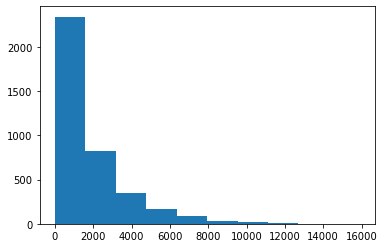

In [7]:
#Plot width
fig, ax = plt.subplots()
ax.hist( df_k4.loc[:, "width"])
plt.show()

# Working with DataFrames

In [8]:
df_k4.columns

Index(['chr', 'start', 'end', 'width'], dtype='object')

In [9]:
df_k4.index

RangeIndex(start=0, stop=3830, step=1)

In [10]:
df_k4.values

array([['3L', 15823270, 15830715, 7445],
       ['2R', 11451787, 11459612, 7825],
       ['3R', 21665759, 21673392, 7633],
       ...,
       ['3R', 4477321, 4479529, 2208],
       ['3L', 711347, 711871, 524],
       ['2L', 6792695, 6795077, 2382]], dtype=object)

In [11]:
df_k4.shape

(3830, 4)

In [12]:
df_k4.loc[0,"chr"]

'3L'

In [13]:
df_k4.loc[:,"chr"]

0       3L
1       2R
2       3R
3       2R
4       3R
        ..
3825    3R
3826    2L
3827    3R
3828    3L
3829    2L
Name: chr, Length: 3830, dtype: object

# Chromosomes Demo

In [14]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

In [15]:
type( chr_k4 )

pandas.core.series.Series

In [16]:
chr_k4.shape

(8,)

In [17]:
chr_k4.loc["2L"]

713

In [18]:
coi = ["2L", "2R"]
chr_k4.loc[ coi ]

2L    713
2R    799
Name: chr, dtype: int64

In [19]:
chr_k4.index

Index(['3R', '2R', '3L', '2L', 'X', '4', 'Y', 'Y_CP007111v1_random'], dtype='object')

## Plot K4 Chromosome Distributions

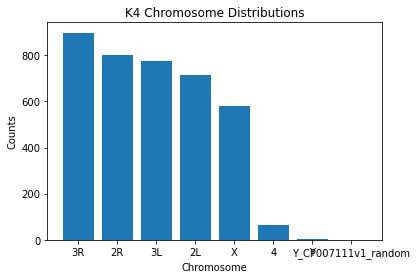

In [29]:
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4 )
ax.set_title('K4 Chromosome Distributions')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Counts')
plt.show()

## Plot K4 Chromosomes in order

In [22]:
coi = ['2L', '2R', '3L', '3R', '4', 'X', 'Y']
coi_sort=chr_k4.loc[coi]
coi_sort


2L    713
2R    799
3L    773
3R    897
4      65
X     580
Y       2
Name: chr, dtype: int64

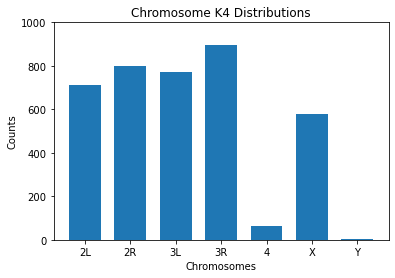

In [30]:
fig, ax = plt.subplots()
ax.bar(coi_sort.index, coi_sort, width = 0.7)
ax.set_title("Chromosome K4 Distributions")
ax.set_ylabel("Counts")
ax.set_xlabel("Chromosomes")
ax.set_ylim(0,1000)
plt.show()

## Question 2: Plot K4 K9 K27 Chromosomes as subplots

In [31]:
df_k9.values
df_k27.values

array([['2L', 5037, 9637],
       ['2L', 322173, 326237],
       ['2L', 365873, 398837],
       ...,
       ['X', 20824191, 20835255],
       ['X', 20924791, 20953755],
       ['X', 21464155, 21496991]], dtype=object)

In [32]:
chr_k9 = df_k9.loc[:,"chr"]
chr_k9= chr_k9.value_counts()
chr_k9

3L                     67
X                      61
2L                     53
3R                     51
2R                     50
4                      11
Y                       2
Y_DS483690v1_random     1
Name: chr, dtype: int64

In [33]:
chr_k27 = df_k27.loc[:, "chr"]
chr_k27 = chr_k27.value_counts()
chr_k27

2R               102
3R                90
3L                89
2L                80
X                 64
4                  5
Un_CP007080v1      1
Name: chr, dtype: int64

In [34]:
coi2= ['2L', '2R', '3L', '3R', '4', 'X', 'Y']
sortedk9 = chr_k9.loc[coi2]
coi3 = ['2L', '2R', '3L', '3R', '4', 'X']
sortedk27 = chr_k27.loc[coi3]

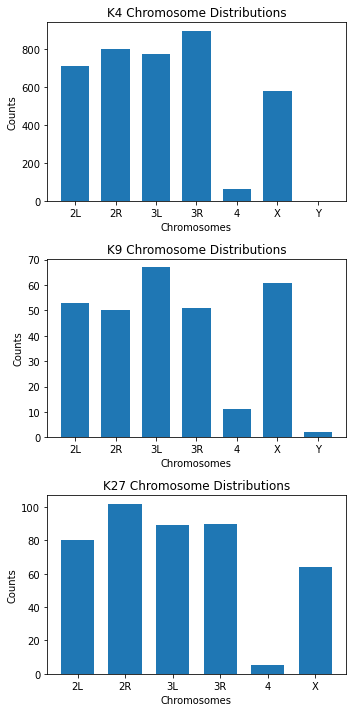

In [35]:
fig, ax = plt.subplots(3, figsize= (5.0, 10.0))
ax[0].bar(coi_sort.index, coi_sort, width = 0.7)
ax[0].set_title("K4 Chromosome Distributions")
ax[0].set_xlabel("Chromosomes")
ax[0].set_ylabel("Counts")
ax[1].bar(sortedk9.index, sortedk9, width = 0.7)
ax[1].set_title("K9 Chromosome Distributions")
ax[1].set_xlabel("Chromosomes")
ax[1].set_ylabel("Counts")
ax[2].bar(sortedk27.index, sortedk27, width = 0.7)
ax[2].set_title("K27 Chromosome Distributions")
ax[2].set_xlabel("Chromosomes")
ax[2].set_ylabel("Counts")
fig.tight_layout()

# Widths

In [36]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


In [37]:
df_k9.loc[:, "width"] = df_k9.loc[:, "end"] - df_k9.loc[:, "start"]
df_k9

,chr,start,end,width
0,2L,5031,13131,8100
1,2L,356567,382831,26264
2,2L,582167,609431,27264
3,2L,975967,996567,20600
4,2L,1667067,1687931,20864
...,...,...,...,...
291,X,22708532,22720332,11800
292,X,22865032,22882596,17564
293,X,22981432,23009896,28464
294,X,23156000,23204164,48164


In [38]:
df_k27.loc[:, "width"] = df_k27.loc[:, "end"] - df_k27.loc[:, "start"]
df_k27

,chr,start,end,width
0,2L,5037,9637,4600
1,2L,322173,326237,4064
2,2L,365873,398837,32964
3,2L,498973,547373,48400
4,2L,579973,608037,28064
...,...,...,...,...
426,X,20310691,20388555,77864
427,X,20534591,20759055,224464
428,X,20824191,20835255,11064
429,X,20924791,20953755,28964


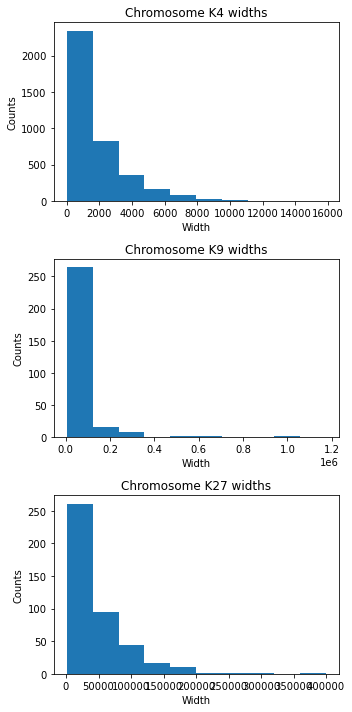

In [47]:
fig, ax = plt.subplots(nrows = 3, figsize = (5.0, 10.0))
ax[0].hist( df_k4.loc[:,"width"] )
ax[0].set_title("Chromosome K4 widths")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Width")
ax[1].hist( df_k9.loc[:, "width"])
ax[1].set_title( "Chromosome K9 widths")
ax[1].set_ylabel("Counts")
ax[1].set_xlabel("Width")
ax[2].hist( df_k27.loc[:, "width"])
ax[2].set_title("Chromosome K27 widths")
ax[2].set_ylabel("Counts")
ax[2].set_xlabel("Width")
fig.tight_layout()
plt.show()